In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('/Users/jhajhajhajha1/Desktop/Hanyang Data/data_playaround.csv')

In [3]:
data = dataset.iloc[:, 0:19]

In [4]:
print(len(data))
data[1000:1010]

46858


,W_ZONE,no_hh,no_hh_chil,hh_type,hh_income,no_car,age,sex,job_type,house_lat,house_lon,work_lat,work_lon,H_ZONE,H_ZONE_X,H_ZONE_Y,W_ZONE_X,W_ZONE_Y,0
1000,88,4.0,3.0,1.0,5.0,1.0,40.0,1.0,4.0,37.511534,126.902390,37.031954,127.077127,954.0,191000.0,445000.0,207000.0,393000.0,25940.567472
1001,88,3.0,3.0,4.0,2.0,2.0,61.0,1.0,6.0,37.000396,127.106922,37.034933,127.078710,50.0,209000.0,389000.0,207000.0,393000.0,25940.567472
1002,88,5.0,3.0,1.0,4.0,1.0,46.0,1.0,4.0,37.195733,127.034267,37.039019,127.077925,287.0,203000.0,411000.0,207000.0,393000.0,25940.567472
1003,88,4.0,4.0,2.0,6.0,1.0,49.0,1.0,6.0,37.067362,127.056343,37.037719,127.077653,130.0,205000.0,397000.0,207000.0,393000.0,25940.567472
1004,88,4.0,2.0,1.0,3.0,1.0,37.0,1.0,4.0,37.151695,127.078077,37.039019,127.077925,218.0,207000.0,405000.0,207000.0,393000.0,25940.567472
1005,88,3.0,3.0,1.0,5.0,1.0,56.0,1.0,6.0,37.053694,127.047655,37.038303,127.082699,105.0,205000.0,395000.0,207000.0,393000.0,25940.567472
1006,88,3.0,3.0,4.0,6.0,1.0,55.0,1.0,6.0,37.102160,127.021462,37.036618,127.077674,173.0,201000.0,401000.0,207000.0,393000.0,25940.567472
1007,88,4.0,4.0,2.0,5.0,1.0,41.0,1.0,6.0,37.037146,127.029241,37.035418,127.074294,86.0,203000.0,393000.0,207000.0,393000.0,25940.567472
1008,88,1.0,1.0,2.0,4.0,1.0,49.0,1.0,6.0,37.076516,127.064009,37.036774,127.072348,130.0,205000.0,397000.0,207000.0,393000.0,25940.567472
1009,88,3.0,3.0,1.0,5.0,1.0,43.0,1.0,6.0,36.989866,127.090719,37.037373,127.088846,35.0,209000.0,387000.0,207000.0,393000.0,25940.567472


In [183]:
# preprocessing

# not calculating distance, simply using latitude
x = data.iloc[:, 0:13]
x = x.drop(["house_lat", "house_lon"], axis= 1)
x.head()

,W_ZONE,no_hh,no_hh_chil,hh_type,hh_income,no_car,age,sex,job_type,work_lat,work_lon
0,0,4.0,4.0,1.0,5.0,1.0,41.0,1.0,4.0,36.115620,126.792747
1,0,3.0,3.0,2.0,3.0,1.0,36.0,1.0,4.0,37.335447,126.677584
2,0,3.0,3.0,2.0,2.0,1.0,70.0,1.0,9.0,36.975082,127.436894
3,0,5.0,4.0,1.0,5.0,1.0,32.0,1.0,4.0,36.847868,127.414170
4,0,2.0,2.0,4.0,3.0,1.0,55.0,1.0,4.0,37.967527,124.717824


In [184]:
x.isnull().sum()

W_ZONE          0
no_hh         180
no_hh_chil    180
hh_type       180
hh_income     180
no_car        180
age           180
sex           180
job_type      180
work_lat      180
work_lon      180
dtype: int64

In [185]:
# # Taking care of missing data
# from sklearn.preprocessing import Imputer
# imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
# imputer = imputer.fit(x.iloc[:, 1:10])
# x.iloc[:, 1:10] = imputer.transform(x.iloc[:, 1:10])
x = x.dropna()

In [186]:
x.isnull().sum()
x.groupby('hh_type').nunique()

,W_ZONE,no_hh,no_hh_chil,hh_type,hh_income,no_car,age,sex,job_type,work_lat,work_lon
hh_type,,,,,,,,,,,
1.0,1326,8,8,1,8,2,66,2,9,15391,15422
2.0,732,7,7,1,8,2,62,2,8,3594,3605
3.0,648,6,6,1,8,2,58,2,9,3210,3214
4.0,1120,7,6,1,8,2,60,2,7,6152,6173
5.0,246,6,5,1,7,2,50,2,7,567,566
6.0,93,6,5,1,6,2,47,2,6,123,123


In [160]:
# category values: hh_type, hh_income (this one is fine because of the levels)
# Encoding categorical data
# encode variable: hh_type, sex, job_type, W_Zone

# make X a numpy array of x
X_W = x.iloc[:, 0]
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# W_Zone
labelencoder_X_W = LabelEncoder()
X_W = labelencoder_X_W.fit_transform(X_W)
for i in range(10):
    print(X_W[i])
onehotencoder_X_W = OneHotEncoder(categorical_features = [0])
X_W = onehotencoder_X_W.fit_transform(X_W.reshape(-1, 1)).toarray()
for i, val in enumerate(X_W[1000:1020]):
    print(i, val)
# Dummy Variable trap
X_W = X_W[:, 1:]
print(len(X_W[1]))

0
0
0
0
0
0
0
0
0
0
0 [0. 0. 0. ... 0. 0. 0.]
1 [0. 0. 0. ... 0. 0. 0.]
2 [0. 0. 0. ... 0. 0. 0.]
3 [0. 0. 0. ... 0. 0. 0.]
4 [0. 0. 0. ... 0. 0. 0.]
5 [0. 0. 0. ... 0. 0. 0.]
6 [0. 0. 0. ... 0. 0. 0.]
7 [0. 0. 0. ... 0. 0. 0.]
8 [0. 0. 0. ... 0. 0. 0.]
9 [0. 0. 0. ... 0. 0. 0.]
10 [0. 0. 0. ... 0. 0. 0.]
11 [0. 0. 0. ... 0. 0. 0.]
12 [0. 0. 0. ... 0. 0. 0.]
13 [0. 0. 0. ... 0. 0. 0.]
14 [0. 0. 0. ... 0. 0. 0.]
15 [0. 0. 0. ... 0. 0. 0.]
16 [0. 0. 0. ... 0. 0. 0.]
17 [0. 0. 0. ... 0. 0. 0.]
18 [0. 0. 0. ... 0. 0. 0.]
19 [0. 0. 0. ... 0. 0. 0.]
1563


In [161]:
# hh_type
X_hh = x.iloc[:, 3]
labelencoder_X_hh = LabelEncoder()
X_hh = labelencoder_X_hh.fit_transform(X_hh)
onehotencoder_hh = OneHotEncoder(categorical_features = [0])
X_hh = onehotencoder_hh.fit_transform(X_hh.reshape(-1, 1)).toarray()
# Dummy Variable trap
X_hh = X_hh[:, 1:]

In [187]:
for i in range(10):
    print(X_hh[i], x.iloc[i, 3])
len(X_hh[0])

[0. 0. 0. 0. 0.] 1.0
[1. 0. 0. 0. 0.] 2.0
[1. 0. 0. 0. 0.] 2.0
[0. 0. 0. 0. 0.] 1.0
[0. 0. 1. 0. 0.] 4.0
[1. 0. 0. 0. 0.] 2.0
[0. 1. 0. 0. 0.] 3.0
[0. 0. 0. 0. 0.] 1.0
[0. 0. 0. 0. 0.] 1.0
[0. 0. 0. 0. 0.] 1.0


5

In [170]:
# job_type
X_job = x.iloc[:, 8]
labelencoder_X_job = LabelEncoder()
X_job = labelencoder_X_job.fit_transform(X_job)
onehotencoder_X_job = OneHotEncoder(categorical_features = [0])
X_job = onehotencoder_X_job.fit_transform(X_job.reshape(-1, 1)).toarray()
# Dummy Variable trap
X_job = X_job[:, 1:]

In [174]:
print(len(X_job[0]))
for i in range(10):
    print(X_job[i], x.iloc[i, 8])

9
[0. 0. 0. 1. 0. 0. 0. 0. 0.] 4.0
[0. 0. 0. 1. 0. 0. 0. 0. 0.] 4.0
[0. 0. 0. 0. 0. 0. 0. 0. 1.] 9.0
[0. 0. 0. 1. 0. 0. 0. 0. 0.] 4.0
[0. 0. 0. 1. 0. 0. 0. 0. 0.] 4.0
[0. 0. 0. 1. 0. 0. 0. 0. 0.] 4.0
[0. 0. 0. 1. 0. 0. 0. 0. 0.] 4.0
[0. 0. 0. 1. 0. 0. 0. 0. 0.] 4.0
[0. 0. 0. 1. 0. 0. 0. 0. 0.] 4.0
[0. 0. 0. 1. 0. 0. 0. 0. 0.] 4.0


In [191]:
# add the variables: 
X = x.values
for i, x1 in enumerate(X[0]):
    print("column %s" %i, x1)
# take out the three columns
X = np.delete(X, 0, axis = 1)
X = np.delete(X, 2, axis = 1)
X = np.delete(X, 6, axis = 1)
print(len(X[0]))
for i, x1 in enumerate(X[0]):
    print("column %s" %i, x1)
X = np.append(X, X_W, axis = 1)
X = np.append(X, X_hh, axis = 1)
X = np.append(X, X_job, axis = 1)
print(len(X[0]))

column 0 0.0
column 1 4.0
column 2 4.0
column 3 1.0
column 4 5.0
column 5 1.0
column 6 41.0
column 7 1.0
column 8 4.0
column 9 36.11562
column 10 126.79274699999999
8
column 0 4.0
column 1 4.0
column 2 5.0
column 3 1.0
column 4 41.0
column 5 1.0
column 6 36.11562
column 7 126.79274699999999
1585


In [192]:
for i, x1 in enumerate(X[0]):
    print("column %s" %i, x1)
'''
Summary:
column 0: no_hh
column 1: no_hh_chil
column 2: hh_income
column 3: no_car
column 4: age
column 5: sex
column 6: work_lat
column 7: work_lon
column 8~1570: W_ZONE
column 1571~1575: hh_type
column 1576~1584: job_type

'''

column 0 4.0
column 1 4.0
column 2 5.0
column 3 1.0
column 4 41.0
column 5 1.0
column 6 36.11562
column 7 126.79274699999999
column 8 0.0
column 9 0.0
column 10 0.0
column 11 0.0
column 12 0.0
column 13 0.0
column 14 0.0
column 15 0.0
column 16 0.0
column 17 0.0
column 18 0.0
column 19 0.0
column 20 0.0
column 21 0.0
column 22 0.0
column 23 0.0
column 24 0.0
column 25 0.0
column 26 0.0
column 27 0.0
column 28 0.0
column 29 0.0
column 30 0.0
column 31 0.0
column 32 0.0
column 33 0.0
column 34 0.0
column 35 0.0
column 36 0.0
column 37 0.0
column 38 0.0
column 39 0.0
column 40 0.0
column 41 0.0
column 42 0.0
column 43 0.0
column 44 0.0
column 45 0.0
column 46 0.0
column 47 0.0
column 48 0.0
column 49 0.0
column 50 0.0
column 51 0.0
column 52 0.0
column 53 0.0
column 54 0.0
column 55 0.0
column 56 0.0
column 57 0.0
column 58 0.0
column 59 0.0
column 60 0.0
column 61 0.0
column 62 0.0
column 63 0.0
column 64 0.0
column 65 0.0
column 66 0.0
column 67 0.0
column 68 0.0
column 69 0.0
column 70

column 897 0.0
column 898 0.0
column 899 0.0
column 900 0.0
column 901 0.0
column 902 0.0
column 903 0.0
column 904 0.0
column 905 0.0
column 906 0.0
column 907 0.0
column 908 0.0
column 909 0.0
column 910 0.0
column 911 0.0
column 912 0.0
column 913 0.0
column 914 0.0
column 915 0.0
column 916 0.0
column 917 0.0
column 918 0.0
column 919 0.0
column 920 0.0
column 921 0.0
column 922 0.0
column 923 0.0
column 924 0.0
column 925 0.0
column 926 0.0
column 927 0.0
column 928 0.0
column 929 0.0
column 930 0.0
column 931 0.0
column 932 0.0
column 933 0.0
column 934 0.0
column 935 0.0
column 936 0.0
column 937 0.0
column 938 0.0
column 939 0.0
column 940 0.0
column 941 0.0
column 942 0.0
column 943 0.0
column 944 0.0
column 945 0.0
column 946 0.0
column 947 0.0
column 948 0.0
column 949 0.0
column 950 0.0
column 951 0.0
column 952 0.0
column 953 0.0
column 954 0.0
column 955 0.0
column 956 0.0
column 957 0.0
column 958 0.0
column 959 0.0
column 960 0.0
column 961 0.0
column 962 0.0
column 963

'\nSummary:\ncolumn 0: no_hh\ncolumn 1: no_hh_chil\ncolumn 2: hh_income\ncolumn 3: no_car\ncolumn 4: age\ncolumn 5: sex\ncolumn 6: work_lat\ncolumn 7: work_lon\ncolumn 8~1570:\ncolumn 1571~1575:\ncolumn 1576~1584:\n\n'

In [199]:
# Higher Dimensions
# higher dimensions for continuous variables: hh_income, age, no_car, no_hh
from sklearn.preprocessing import PolynomialFeatures

# no_hh
X_no_hh = X[:, 0]
poly_reg_no_hh = PolynomialFeatures(degree = 4)
X_no_hh = poly_reg_no_hh.fit_transform(X_no_hh.reshape(-1, 1))
X_no_hh = np.delete(X_no_hh, 0, axis = 1)
X_no_hh = np.delete(X_no_hh, 0, axis = 1)

X = np.append(X, X_no_hh, axis = 1)


In [202]:
print(len(X[0]))
'''
column 1585~1587: poly no_hh
'''
for i, x1 in enumerate(X[0]):
    print("column %s" %i, x1)

1588
column 0 4.0
column 1 4.0
column 2 5.0
column 3 1.0
column 4 41.0
column 5 1.0
column 6 36.11562
column 7 126.79274699999999
column 8 0.0
column 9 0.0
column 10 0.0
column 11 0.0
column 12 0.0
column 13 0.0
column 14 0.0
column 15 0.0
column 16 0.0
column 17 0.0
column 18 0.0
column 19 0.0
column 20 0.0
column 21 0.0
column 22 0.0
column 23 0.0
column 24 0.0
column 25 0.0
column 26 0.0
column 27 0.0
column 28 0.0
column 29 0.0
column 30 0.0
column 31 0.0
column 32 0.0
column 33 0.0
column 34 0.0
column 35 0.0
column 36 0.0
column 37 0.0
column 38 0.0
column 39 0.0
column 40 0.0
column 41 0.0
column 42 0.0
column 43 0.0
column 44 0.0
column 45 0.0
column 46 0.0
column 47 0.0
column 48 0.0
column 49 0.0
column 50 0.0
column 51 0.0
column 52 0.0
column 53 0.0
column 54 0.0
column 55 0.0
column 56 0.0
column 57 0.0
column 58 0.0
column 59 0.0
column 60 0.0
column 61 0.0
column 62 0.0
column 63 0.0
column 64 0.0
column 65 0.0
column 66 0.0
column 67 0.0
column 68 0.0
column 69 0.0
colu

column 1015 0.0
column 1016 0.0
column 1017 0.0
column 1018 0.0
column 1019 0.0
column 1020 0.0
column 1021 0.0
column 1022 0.0
column 1023 0.0
column 1024 0.0
column 1025 0.0
column 1026 0.0
column 1027 0.0
column 1028 0.0
column 1029 0.0
column 1030 0.0
column 1031 0.0
column 1032 0.0
column 1033 0.0
column 1034 0.0
column 1035 0.0
column 1036 0.0
column 1037 0.0
column 1038 0.0
column 1039 0.0
column 1040 0.0
column 1041 0.0
column 1042 0.0
column 1043 0.0
column 1044 0.0
column 1045 0.0
column 1046 0.0
column 1047 0.0
column 1048 0.0
column 1049 0.0
column 1050 0.0
column 1051 0.0
column 1052 0.0
column 1053 0.0
column 1054 0.0
column 1055 0.0
column 1056 0.0
column 1057 0.0
column 1058 0.0
column 1059 0.0
column 1060 0.0
column 1061 0.0
column 1062 0.0
column 1063 0.0
column 1064 0.0
column 1065 0.0
column 1066 0.0
column 1067 0.0
column 1068 0.0
column 1069 0.0
column 1070 0.0
column 1071 0.0
column 1072 0.0
column 1073 0.0
column 1074 0.0
column 1075 0.0
column 1076 0.0
column 1

In [203]:
# hh_income
X_hh_income = X[:, 2]
poly_reg_hh_income = PolynomialFeatures(degree = 4)
X_hh_income = poly_reg_hh_income.fit_transform(X_hh_income.reshape(-1, 1))
X_hh_income = np.delete(X_hh_income, 0, axis = 1)
X_hh_income = np.delete(X_hh_income, 0, axis = 1)

X = np.append(X, X_hh_income, axis = 1)



In [204]:
print(len(X[0]))
'''
column 1588~1590: poly hh_income
'''
for i, x1 in enumerate(X[0]):
    print("column %s" %i, x1)

1591
column 0 4.0
column 1 4.0
column 2 5.0
column 3 1.0
column 4 41.0
column 5 1.0
column 6 36.11562
column 7 126.79274699999999
column 8 0.0
column 9 0.0
column 10 0.0
column 11 0.0
column 12 0.0
column 13 0.0
column 14 0.0
column 15 0.0
column 16 0.0
column 17 0.0
column 18 0.0
column 19 0.0
column 20 0.0
column 21 0.0
column 22 0.0
column 23 0.0
column 24 0.0
column 25 0.0
column 26 0.0
column 27 0.0
column 28 0.0
column 29 0.0
column 30 0.0
column 31 0.0
column 32 0.0
column 33 0.0
column 34 0.0
column 35 0.0
column 36 0.0
column 37 0.0
column 38 0.0
column 39 0.0
column 40 0.0
column 41 0.0
column 42 0.0
column 43 0.0
column 44 0.0
column 45 0.0
column 46 0.0
column 47 0.0
column 48 0.0
column 49 0.0
column 50 0.0
column 51 0.0
column 52 0.0
column 53 0.0
column 54 0.0
column 55 0.0
column 56 0.0
column 57 0.0
column 58 0.0
column 59 0.0
column 60 0.0
column 61 0.0
column 62 0.0
column 63 0.0
column 64 0.0
column 65 0.0
column 66 0.0
column 67 0.0
column 68 0.0
column 69 0.0
colu

column 920 0.0
column 921 0.0
column 922 0.0
column 923 0.0
column 924 0.0
column 925 0.0
column 926 0.0
column 927 0.0
column 928 0.0
column 929 0.0
column 930 0.0
column 931 0.0
column 932 0.0
column 933 0.0
column 934 0.0
column 935 0.0
column 936 0.0
column 937 0.0
column 938 0.0
column 939 0.0
column 940 0.0
column 941 0.0
column 942 0.0
column 943 0.0
column 944 0.0
column 945 0.0
column 946 0.0
column 947 0.0
column 948 0.0
column 949 0.0
column 950 0.0
column 951 0.0
column 952 0.0
column 953 0.0
column 954 0.0
column 955 0.0
column 956 0.0
column 957 0.0
column 958 0.0
column 959 0.0
column 960 0.0
column 961 0.0
column 962 0.0
column 963 0.0
column 964 0.0
column 965 0.0
column 966 0.0
column 967 0.0
column 968 0.0
column 969 0.0
column 970 0.0
column 971 0.0
column 972 0.0
column 973 0.0
column 974 0.0
column 975 0.0
column 976 0.0
column 977 0.0
column 978 0.0
column 979 0.0
column 980 0.0
column 981 0.0
column 982 0.0
column 983 0.0
column 984 0.0
column 985 0.0
column 986

In [205]:
# age
X_age = X[:, 4]
poly_reg_age = PolynomialFeatures(degree = 4)
X_age = poly_reg_age.fit_transform(X_age.reshape(-1, 1))
X_age = np.delete(X_age, 0, axis = 1)
X_age = np.delete(X_age, 0, axis = 1)

X = np.append(X, X_age, axis = 1)



In [206]:
print(len(X[0]))
'''
column 1591~1593: poly X_age
'''
for i, x1 in enumerate(X[0]):
    print("column %s" %i, x1)

1594
column 0 4.0
column 1 4.0
column 2 5.0
column 3 1.0
column 4 41.0
column 5 1.0
column 6 36.11562
column 7 126.79274699999999
column 8 0.0
column 9 0.0
column 10 0.0
column 11 0.0
column 12 0.0
column 13 0.0
column 14 0.0
column 15 0.0
column 16 0.0
column 17 0.0
column 18 0.0
column 19 0.0
column 20 0.0
column 21 0.0
column 22 0.0
column 23 0.0
column 24 0.0
column 25 0.0
column 26 0.0
column 27 0.0
column 28 0.0
column 29 0.0
column 30 0.0
column 31 0.0
column 32 0.0
column 33 0.0
column 34 0.0
column 35 0.0
column 36 0.0
column 37 0.0
column 38 0.0
column 39 0.0
column 40 0.0
column 41 0.0
column 42 0.0
column 43 0.0
column 44 0.0
column 45 0.0
column 46 0.0
column 47 0.0
column 48 0.0
column 49 0.0
column 50 0.0
column 51 0.0
column 52 0.0
column 53 0.0
column 54 0.0
column 55 0.0
column 56 0.0
column 57 0.0
column 58 0.0
column 59 0.0
column 60 0.0
column 61 0.0
column 62 0.0
column 63 0.0
column 64 0.0
column 65 0.0
column 66 0.0
column 67 0.0
column 68 0.0
column 69 0.0
colu

column 1073 0.0
column 1074 0.0
column 1075 0.0
column 1076 0.0
column 1077 0.0
column 1078 0.0
column 1079 0.0
column 1080 0.0
column 1081 0.0
column 1082 0.0
column 1083 0.0
column 1084 0.0
column 1085 0.0
column 1086 0.0
column 1087 0.0
column 1088 0.0
column 1089 0.0
column 1090 0.0
column 1091 0.0
column 1092 0.0
column 1093 0.0
column 1094 0.0
column 1095 0.0
column 1096 0.0
column 1097 0.0
column 1098 0.0
column 1099 0.0
column 1100 0.0
column 1101 0.0
column 1102 0.0
column 1103 0.0
column 1104 0.0
column 1105 0.0
column 1106 0.0
column 1107 0.0
column 1108 0.0
column 1109 0.0
column 1110 0.0
column 1111 0.0
column 1112 0.0
column 1113 0.0
column 1114 0.0
column 1115 0.0
column 1116 0.0
column 1117 0.0
column 1118 0.0
column 1119 0.0
column 1120 0.0
column 1121 0.0
column 1122 0.0
column 1123 0.0
column 1124 0.0
column 1125 0.0
column 1126 0.0
column 1127 0.0
column 1128 0.0
column 1129 0.0
column 1130 0.0
column 1131 0.0
column 1132 0.0
column 1133 0.0
column 1134 0.0
column 1

In [ ]:
# no_car
X_no_car = X[:, 4]
poly_reg_car = PolynomialFeatures(degree = 4)
X_no_car = poly_reg_age.fit_transform(X_age.reshape(-1, 1))
X_no_car = np.delete(X_no_car, 0, axis = 1)
X_no_car = np.delete(X_no_car, 0, axis = 1)

X = np.append(X, X_age, axis = 1)

In [ ]:
print(len(X[0]))
'''
column 1591~1593: poly X_age
'''
for i, x1 in enumerate(X[0]):
    print("column %s" %i, x1)

In [11]:
y = data.loc[:, ["house_lat", "house_lon"]]
y.head()

,house_lat,house_lon
0,37.453952,126.716877
1,37.465845,126.717234
2,37.229621,127.284122
3,37.623500,127.083187
4,37.469676,126.644354


In [12]:
y.isnull().sum()

house_lat    180
house_lon    180
dtype: int64

In [13]:
# # Taking care of missing data
# from sklearn.preprocessing import Imputer
# imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
# imputer = imputer.fit(y)
# y = imputer.transform(y)
y = y.dropna()
Y = y.values
Y

array([[ 37.453952, 126.716877],
       [ 37.465845, 126.717234],
       [ 37.229621, 127.284122],
       ...,
       [ 38.105379, 127.204076],
       [ 38.129228, 127.225464],
       [ 38.184626, 127.10823 ]])

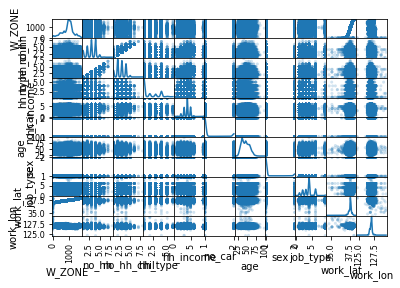

In [13]:
# visualize variables
from pandas.plotting import scatter_matrix
scatter_matrix(x, alpha = 0.2, diagonal = 'kde')
plt.show()

In [93]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [94]:
# Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)
# Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [95]:
# Random Forest Regression
# Fitting the Random Forest Regression Model to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [96]:
y_pred = regressor.predict(X_test)

In [98]:
prediction = pd.DataFrame({'house_lat': y_test[:, 0],'house_lon':y_test[:, 1],
                            'house_lat (pred)': y_pred[:,0], 'house_lon (pred)': y_pred[:,1]})

In [99]:
# accuracy based on distance
def accuracy(pred):
    sum_error = 0
    for i in range(len(pred)):
        deltax = pred.iloc[i][0]-pred.iloc[i][2]
        deltay = pred.iloc[i][1]-pred.iloc[i][3]
        error = (deltax**2 + deltay**2)**(0.5)
        sum_error += error
    return sum_error

def ind_diff(pred):
    diff = []
    for i in range(len(pred)):
        deltax = pred.iloc[i][0]-pred.iloc[i][2]
        deltay = pred.iloc[i][1]-pred.iloc[i][3]
        error = (deltax**2 + deltay**2)**(0.5)
        diff.append(error)
    return pd.DataFrame({'Difference': diff})


In [100]:
accuracy(prediction)

823.1777371486922

In [101]:
prediction.head()

,house_lat,house_lon,house_lat (pred),house_lon (pred)
0,37.607582,127.348879,37.520099,127.442859
1,37.594757,127.153212,37.619830,127.119677
2,37.514340,127.062632,37.512968,127.040396
3,37.469662,126.701077,37.349974,127.018540
4,37.440188,126.798281,37.291215,127.005598


In [102]:
difference = ind_diff(prediction)

In [103]:
difference.head()

,Difference
0,0.128396
1,0.041872
2,0.022279
3,0.339276
4,0.255290


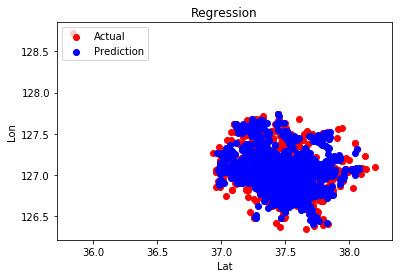

In [105]:
plt.scatter(y_test[:, 0], y_test[:, 1], color = "red", label = 'Actual')
plt.scatter(y_pred[:, 0], y_pred[:, 1], color = "blue", label = 'Prediction')
plt.title('Regression')
plt.xlabel('Lat')
plt.ylabel('Lon')
plt.legend(loc='upper left')
plt.show()

In [25]:
# SVR
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

Svr = SVR(kernel = 'rbf')
regressor = MultiOutputRegressor(Svr)
regressor.fit(X_train, y_train)

MultiOutputRegressor(estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
           n_jobs=1)

In [26]:
y_pred = regressor.predict(X_test)

In [27]:
prediction = pd.DataFrame({'house_lat': y_test.iloc[:, 0],'house_lon':y_test.iloc[:, 1],
                            'house_lat (pred)': y_pred[:,0], 'house_lon (pred)': y_pred[:,1]})

In [28]:
accuracy(prediction)

895.4992967112057

In [29]:
difference = ind_diff(prediction)

In [30]:
difference.head()

,Difference
0,0.096250
1,0.121615
2,0.029366
3,0.384996
4,0.262974


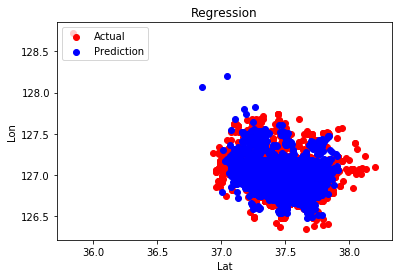

In [31]:
plt.scatter(y_test.iloc[:, 0], y_test.iloc[:, 1], color = "red", label = 'Actual')
plt.scatter(y_pred[:, 0], y_pred[:, 1], color = "blue", label = 'Prediction')
plt.title('Regression')
plt.xlabel('Lat')
plt.ylabel('Lon')
plt.legend(loc='upper left')
plt.show()

In [32]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.
/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [123]:
# Initialising the ANN
regressor = Sequential()

# Adding the input layer and the first hidden layer
regressor.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 1585))
regressor.add(Dropout(0.1))

# Adding the second hidden layer
regressor.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
regressor.add(Dropout(0.1))

# Adding the third hidden layer
regressor.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
regressor.add(Dropout(0.1))

# Adding the output layer
regressor.add(Dense(units = 2, kernel_initializer = 'normal', activation = 'linear'))

# Compiling the ANN
regressor.compile(optimizer = 'adam', loss = 'logcosh', metrics = ['mae'])
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                25376     
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 66        
Total para

In [124]:
regressor.fit(X_train, y_train, batch_size = 10, epochs = 270)

Epoch 1/270
37342/37342 [==============================] - 5s 139us/step - loss: 9.5631 - mean_absolute_error: 10.2121
Epoch 2/270
37342/37342 [==============================] - 5s 129us/step - loss: 5.9478 - mean_absolute_error: 6.5861
Epoch 3/270
37342/37342 [==============================] - 5s 143us/step - loss: 5.1045 - mean_absolute_error: 5.7326
Epoch 4/270
37342/37342 [==============================] - 6s 168us/step - loss: 4.9241 - mean_absolute_error: 5.5498
Epoch 5/270
37342/37342 [==============================] - 6s 163us/step - loss: 4.7855 - mean_absolute_error: 5.4088
Epoch 6/270
37342/37342 [==============================] - 7s 178us/step - loss: 4.5664 - mean_absolute_error: 5.1853
Epoch 7/270
37342/37342 [==============================] - 7s 196us/step - loss: 4.4447 - mean_absolute_error: 5.0601
Epoch 8/270
37342/37342 [==============================] - 7s 189us/step - loss: 4.2745 - mean_absolute_error: 4.8879 1s - loss: 4.2746 - mean_ab - ETA: 0s - loss: 4.2766 - 

37342/37342 [==============================] - 4s 119us/step - loss: 0.5204 - mean_absolute_error: 0.8336
Epoch 138/270
37342/37342 [==============================] - 4s 119us/step - loss: 0.4989 - mean_absolute_error: 0.8117
Epoch 139/270
37342/37342 [==============================] - 4s 118us/step - loss: 0.4804 - mean_absolute_error: 0.7921
Epoch 140/270
37342/37342 [==============================] - 5s 122us/step - loss: 0.4633 - mean_absolute_error: 0.7740
Epoch 141/270
37342/37342 [==============================] - 5s 138us/step - loss: 0.4440 - mean_absolute_error: 0.7524
Epoch 142/270
37342/37342 [==============================] - 5s 128us/step - loss: 0.4233 - mean_absolute_error: 0.7293
Epoch 143/270
37342/37342 [==============================] - 5s 132us/step - loss: 0.4098 - mean_absolute_error: 0.7146
Epoch 144/270
37342/37342 [==============================] - 5s 125us/step - loss: 0.3862 - mean_absolute_error: 0.6885
Epoch 145/270
37342/37342 [===========================

In [125]:
y_pred = regressor.predict(X_test)

In [126]:
np.shape(X_test)

(9336, 1585)

In [127]:
prediction = pd.DataFrame({'house_lat': y_test[:, 0],'house_lon':y_test[:, 1],
                            'house_lat (pred)': y_pred[:,0], 'house_lon (pred)': y_pred[:,1]})

In [128]:
np.shape(y_pred)

(9336, 2)

In [129]:
accuracy(prediction)

1972.0146140609259

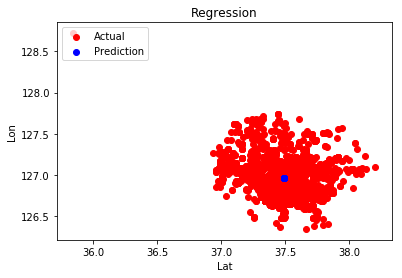

In [130]:
# plot?
plt.scatter(y_test[:, 0], y_test[:, 1], color = "red", label = 'Actual')
plt.scatter(y_pred[:, 0], y_pred[:, 1], color = "blue", label = 'Prediction')
plt.title('Regression')
plt.xlabel('Lat')
plt.ylabel('Lon')
plt.legend(loc='upper left')
plt.show()

In [131]:
prediction.head()

,house_lat,house_lon,house_lat (pred),house_lon (pred)
0,37.607582,127.348879,37.495926,126.959564
1,37.594757,127.153212,37.495926,126.959564
2,37.514340,127.062632,37.495926,126.959564
3,37.469662,126.701077,37.495926,126.959564
4,37.440188,126.798281,37.495926,126.959564


In [132]:
np.mean(prediction)

house_lat            37.494552
house_lon           126.964716
house_lat (pred)     37.495926
house_lon (pred)    126.959564
dtype: float64